# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a dataset containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [1]:
#Import all libraries 
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")

#Uncomment if we are not in the data folder (depends on the current location)
#os.chdir("./data")

files_list=os.listdir()

#Initialize the Dataframe
fnd=pd.DataFrame([])

#Function to remove all the nan values and to correct data (can be optimized)
def clean_data(df):
    for col in df.columns:
        if (str(col) == "Investor") | (str(col) == "HeadQuarter") | (str(col) == "Stage"):
            df[col]=df[col].fillna("Unknown")
        elif (str(col) == "Founded") | (str(col) == "Amount($)"):
            df[col]=df[col].fillna("0")
    
    for ind in df.index:
        if not(df["Amount($)"][ind]=="0"):
            df["Amount($)"][ind]=re.sub('[@.,;"?!\'():#$-]','',str(df["Amount($)"][ind]))
            df["Amount($)"][ind]=df["Amount($)"][ind].replace("Undisclosed","0")
        if df["Amount($)"][ind]=="":
            df["Amount($)"][ind]="0"
        if df["Investor"][ind]=="Undisclosed":
            df["Investor"][ind]=df["Investor"][ind].replace("Undisclosed","Unknown")
    return df

#Load the data from all the 3 files
for file in files_list:
    if str(file).startswith("startup"):
        df_tmp = pd.read_csv(file)
        df_tmp=clean_data(df_tmp)      
        df_tmp["Year"]=int(str(file)[-8:-4])
        if fnd.empty:
            fnd=df_tmp
        else:
            fnd=pd.concat([fnd,df_tmp],axis=0,ignore_index=True)

#ANSWER
print("R: Shape: " + str(fnd.shape) + " (" + str(fnd.shape[0]) + " rows and " + str(fnd.shape[1]) + " columns)")


R: Shape: (2343, 10) (2343 rows and 10 columns)


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [3]:
#Function to change types to numeric
def to_numeric(df):
    
    for ind in df.index:
        if df["Founded"][ind]=="-":
            df["Founded"][ind]=0
    df["Founded"]=df["Founded"].astype(np.int64)
    df["Amount($)"]=df["Amount($)"].astype(np.int64)
    return df

#Change data types to numeric (floats and ints)
fnd=to_numeric(fnd)

#ANSWER
print(f"R: The total amount of funding was {fnd['Amount($)'].sum():,} $.")

R: The total amount of funding was 271,558,456,804 $.


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [4]:
#I just changed it a bit because variable high_investor will be useful in the next steps
# run this cell (don not delete it) 
high_investor=fnd[(fnd['Investor']!="Unknown")].groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)
print(high_investor)

                      Investor  size
696  Inflection Point Ventures    36


In [5]:
#Filter the data and sort values
investors2020=fnd[(fnd['Investor']!="Unknown") & (fnd['Year']==2020)].groupby('Investor', as_index=False).size().sort_values('size', ascending=False)

#Add the column rank to rank the size with ascending=False
investors2020["rank"]=investors2020["size"].rank(method="max",ascending=False)

#ANSWER
print(f"R: The rank of {high_investor.Investor.values[0]} was {np.int16(investors2020[investors2020['Investor']==high_investor.Investor.values[0]]['rank'].values[0])}th.")

R: The rank of Inflection Point Ventures was 4th.


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [6]:
#Load the data sps
sps = pd.read_csv("Software Professionals Salary.csv")

#Create groups by location and calculate the average rating and salary
sps_loc=sps[["Location","Rating","Salary"]].groupby("Location",as_index=False).mean()

#Round the mean values
sps_loc.Rating=round(sps_loc.Rating,2)
sps_loc.Salary=round(sps_loc.Salary,2)

#Filter the fnd dataframe to maintain only 2021's rows
fnd_loc=fnd[fnd["Year"]==2021]

#Create groups by headquarter and calculate the count of Companies in that location as well as the sum of amount invested
fnd_loc=fnd_loc[["HeadQuarter","Company/Brand","Amount($)"]].groupby("HeadQuarter",as_index=False).agg({'Company/Brand': 'count','Amount($)': 'sum'})

#Rename the column headquarter to location to make the merging easier 
fnd_loc=fnd_loc.rename(columns={"HeadQuarter":"Location"})

#Merge the two data sets by location (inner join)
sps_fnd_loc=pd.merge(sps_loc, fnd_loc, on='Location', how='inner')

#Fill NaN with zeros
sps_fnd_loc=sps_fnd_loc.fillna(0)

#Create the column in $MM for amount and drop the amount in $.
sps_fnd_loc["Amount($MM)"]=round(sps_fnd_loc["Amount($)"]/1000000,2)
sps_fnd_loc=sps_fnd_loc.drop(["Amount($)"],axis=1)

#Rename all the columns
sps_fnd_loc=sps_fnd_loc.rename(columns={"Location":"City","Rating":"Avg. Rating","Salary":"Avg. Salary","Company/Brand":"Nr. Companies Funded","Amount($MM)":"Sum Funding($MM)"})

#Find the city with the highest avg. rating and the corresponding number of companies founded
high_score=sps_fnd_loc[sps_fnd_loc["Avg. Rating"]==max(sps_fnd_loc["Avg. Rating"])]
high_score["Nr. Companies Funded"]=np.int64(high_score["Nr. Companies Funded"])

#ANSWER
print(f"R: The city that received the highest Avg. Rating was {high_score['City'].values[0]} which founded {high_score['Nr. Companies Funded'].values[0]} companies.")


R: The city that received the highest Avg. Rating was Kolkata which founded 5 companies.


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

R: The city that stands out in terms of total funding received by companies and salary paid was Mumbai.


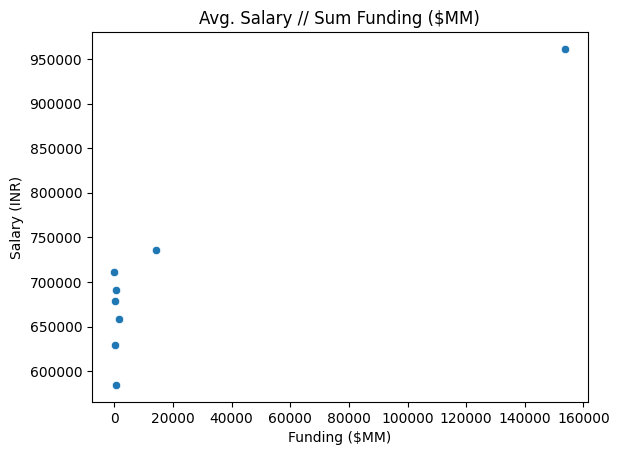

In [7]:
#Import all the dependencies needed
import seaborn as sns
import matplotlib.pyplot as plt

#Open a figure and draw the scatter plot Avg Salary vs Sum Funding
plt.figure(1)
sns.scatterplot(x='Sum Funding($MM)', y='Avg. Salary', data=sps_fnd_loc).set(title="Avg. Salary // Sum Funding ($MM)",xlabel="Funding ($MM)",ylabel="Salary (INR)")

print(f"R: The city that stands out in terms of total funding received by companies and salary paid was {sps_fnd_loc[sps_fnd_loc['Sum Funding($MM)']==max(sps_fnd_loc['Sum Funding($MM)'])]['City'].values[0]}.")

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

Q1 - R: The city with the highest literacy level (98.36) in the country is Aizawl.
Q2 - R: The missing city is New Delhi.
Q3 - R: From my results, I don't see a strong relation between the variables Literacy and Average Salary. Jaipur, Kolkata, Bangalore and Mumbai       seem to fit on a positive relation between the two variables. However, the other variables seem to be out of this trend, especially Chennai, where      the literacy is high (actually the highest) and the average salary is the lowest.


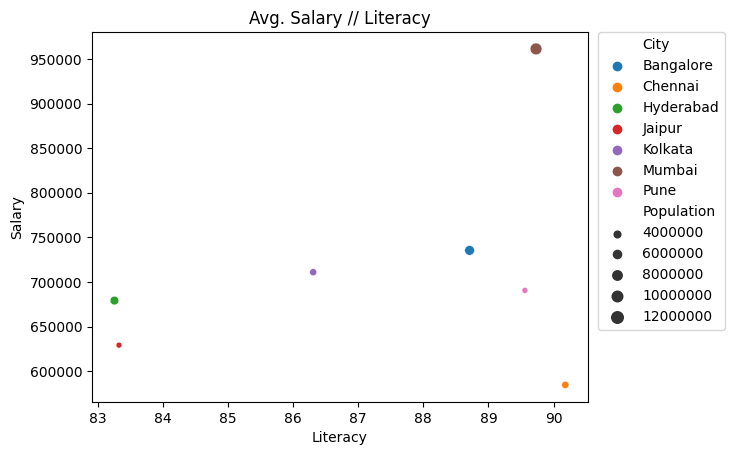

In [8]:
#Import all the dependencies needed
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time 
import pandas as pd

#Open driver in the required page
driver = webdriver.Chrome()
driver.get("https://www.census2011.co.in/city.php")

#This piece of code was added because all time I was opening the page, an automatic small window opened, so all time I made sure to close this small annoying window before proceed (actually this made me lost a lot of time)
time.sleep(5)
driver.find_element(By.CLASS_NAME,"fc-button-label").click()
time.sleep(5)

#Pick the web element with tag table
table_el = driver.find_element(By.TAG_NAME, "table")

#Function to pick the data from the table row by row, first  picking tr elements and then td
def get_data(table_el):
 
    table_rows=table_el.find_elements(By.TAG_NAME, "tr")

    df=pd.DataFrame()
    
    for row in table_rows:
         
         lane=[]
         td = row.find_elements(By.TAG_NAME,"td")
         for el in td:
            lane.append(el.text)
         
         if len(lane) != 0 :
          df=pd.concat([df,pd.Series(lane)], axis=1,ignore_index=True)
    
    return df.T

#Get data using the function above
cities=get_data(table_el)

#Setting columns' names
cities.columns=["id","City","State","Population","Metropolian","Sexratio","Literacy"]

#Selecting the city with the highest literacy
high_literacy=cities[cities.Literacy==max(cities.Literacy)].head(1)

#ANSWER 1
print(f"Q1 - R: The city with the highest literacy level ({high_literacy['Literacy'].values[0]}) in the country is {high_literacy['City'].values[0]}.")

#Merge the data sets sps_fnd_loc and cities by city (inner join) and changing literacy type to float
sps_fnd_loc_lit=pd.merge(sps_fnd_loc, cities, on='City', how='inner')
sps_fnd_loc_lit["Literacy"]=sps_fnd_loc_lit["Literacy"].astype(float)

#Change Population varible type to int
for ind in sps_fnd_loc_lit.index:
    sps_fnd_loc_lit["Population"][ind]=re.sub('[@.,;"?!\'():#$-]','',str(sps_fnd_loc_lit["Population"][ind]))
sps_fnd_loc_lit["Population"]=sps_fnd_loc_lit["Population"].astype(int)

#Find the missing city
not_in_commum_city=sps_fnd_loc[(sps_fnd_loc["City"].isin(sps_fnd_loc_lit["City"]))==False]

#ANSWER 2
print(f"Q2 - R: The missing city is {not_in_commum_city['City'].values[0]}.")

#Open a figure and draw the scatter plot Avg Salary vs Literacy
plt.figure(1)
sns.scatterplot(x='Literacy', y='Avg. Salary', data=sps_fnd_loc_lit, size='Population', hue='City').set(title="Avg. Salary // Literacy",xlabel="Literacy",ylabel="Salary")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#ANSWER 3
print("Q3 - R: From my results, I don't see a strong relation between the variables Literacy and Average Salary. Jaipur, Kolkata, Bangalore and Mumbai\
       seem to fit on a positive relation between the two variables. However, the other variables seem to be out of this trend, especially Chennai, where\
      the literacy is high (actually the highest) and the average salary is the lowest.")
